In [1]:
import numpy as np
import pandas as pd 

In [2]:
from IPython.display import (
    Markdown as md,
    Latex,
    HTML,
)
from tqdm.auto import tqdm

In [3]:
tweets = pd.read_csv("Datasets/twitter_sentiment_data.csv")

In [4]:
display(tweets.shape)

(43943, 3)

In [5]:
value_counts = tweets["sentiment"].value_counts()
value_counts.name = "Raw Number"

value_normd = tweets["sentiment"].value_counts(normalize=True)
value_normd.name = "Percentage"

display(pd.concat([value_counts, value_normd], axis=1))

,Raw Number,Percentage
1,22962,0.522541
2,9276,0.211092
0,7715,0.175568
-1,3990,0.090799


In [6]:
display(tweets.head())

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [7]:
from copy import deepcopy
eda = deepcopy(tweets)

In [8]:
sentiment_num2name = {
    -1: "Anti",
     0: "Neutral",
     1: "Pro",
     2: "News",
}
eda["sentiment"] = eda["sentiment"].apply(lambda num: sentiment_num2name[num])
eda.head()

,sentiment,message,tweetid
0,Anti,@tiniebeany climate change is an interesting h...,792927353886371840
1,Pro,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,Pro,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,Pro,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,News,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [9]:
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

sns.set(font_scale=1.5)
style.use("seaborn-poster")

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


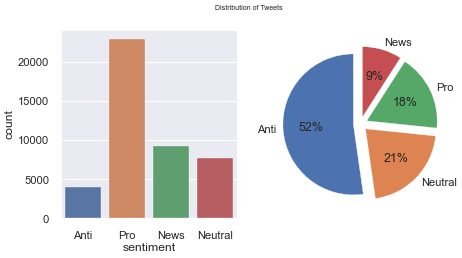

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=50)

sns.countplot(eda["sentiment"], ax=axes[0])
labels = list(sentiment_num2name.values())

axes[1].pie(eda["sentiment"].value_counts(),
            labels=labels,
            autopct="%1.0f%%",
            startangle=90,
            explode=tuple([0.1] * len(labels)))

fig.suptitle("Distribution of Tweets", fontsize=10)
plt.show()

In [11]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  

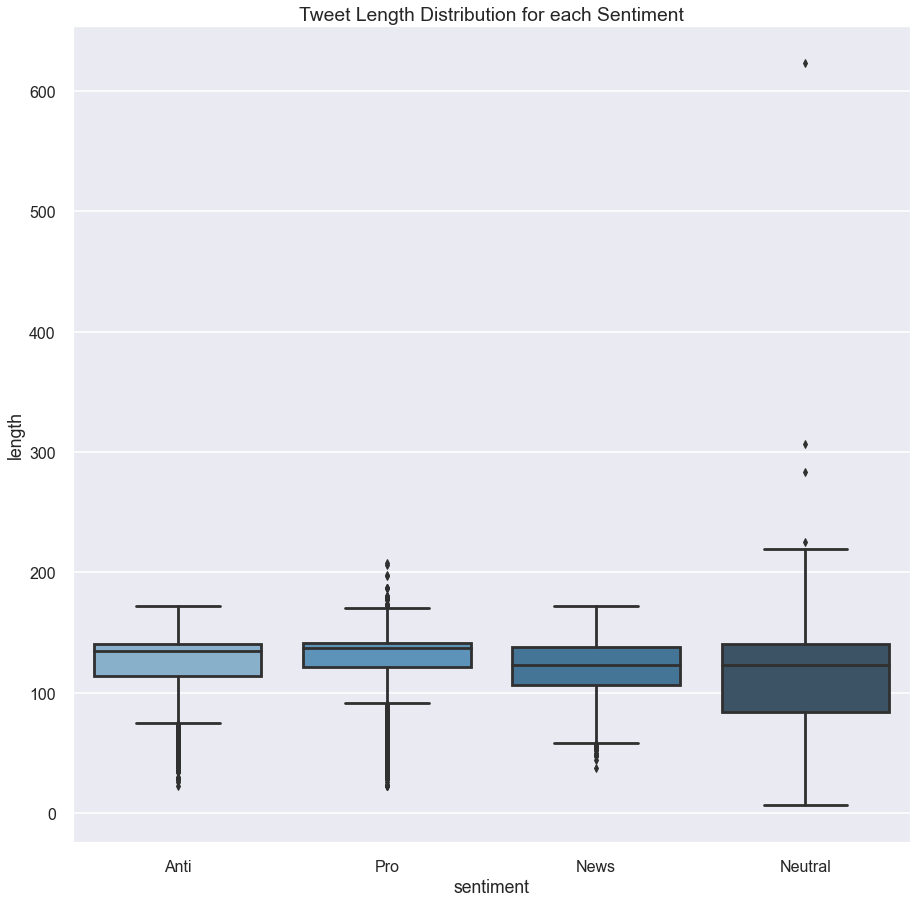

In [12]:
plt.figure(figsize=(15, 15))
eda["length"] = eda["message"].str.len()
sns.boxplot(x="sentiment", y="length", data=eda, palette=("Blues_d"))
plt.title("Tweet Length Distribution for each Sentiment")
plt.show()

In [13]:
from collections import Counter

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [15]:
X_all = tweets["message"]
y_all = tweets["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=1337)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1337)

In [16]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(X_train)

<24717x48846 sparse matrix of type '<class 'numpy.float64'>'
	with 431184 stored elements in Compressed Sparse Row format>

In [17]:
def train(tfidf, model, train_data, train_labels, test_data):
    model.fit(tfidf.transform(train_data), train_labels)
    preds = model.predict(tfidf.transform(test_data))
    
    return preds

In [18]:
def grade(model, preds, test_labels):
    print(metrics.classification_report(test_labels, preds))
    
    cm = confusion_matrix(test_labels, preds)
    cm_normd = cm / cm.sum(axis=1).reshape(-1, 1)
    
    heatmap_kwargs = dict(
        cmap="YlGnBu",
        xticklabels=model.classes_,
        yticklabels=model.classes_,
        vmin=0.,
        vmax=1.,
        annot=True,
        annot_kws={"size": 10},
    )
    
    sns.heatmap(cm_normd, **heatmap_kwargs)
    
    plt.title(f"{model.__class__.__name__} Classification")
    plt.ylabel("Ground-truth labels")
    plt.xlabel("Predicted labels")
    plt.plot()

In [19]:
def function(tfidf, model, train_data, train_labels, test_data, test_labels):
    preds = train(tfidf, model, train_data, train_labels, test_data)
    grade(model, preds, test_labels)

## Random Forests


c:\programdata\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\programdata\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\programdata\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       787
           0       0.00      0.00      0.00      1420
           1       0.52      1.00      0.69      4301
           2       0.00      0.00      0.00      1732

    accuracy                           0.52      8240
   macro avg       0.13      0.25      0.17      8240
weighted avg       0.27      0.52      0.36      8240



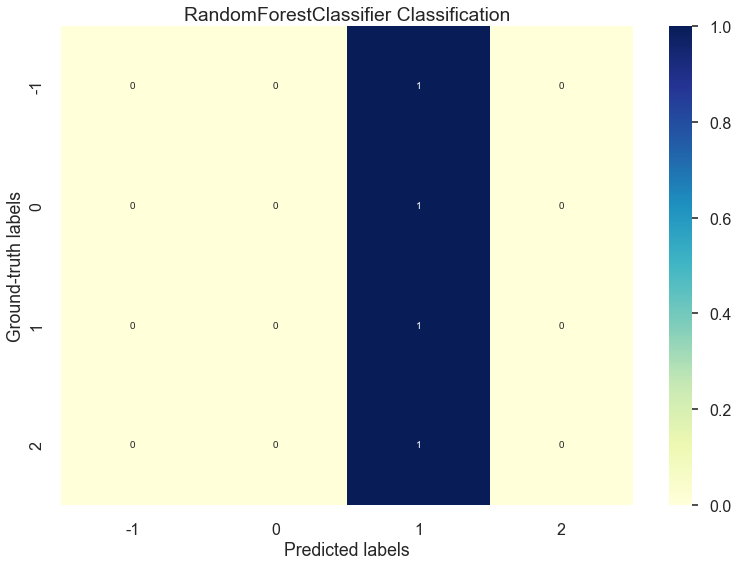

In [20]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100)
function(tfidf, rf, X_train, y_train, X_valid, y_valid)

              precision    recall  f1-score   support

          -1       1.00      0.01      0.02       787
           0       0.97      0.04      0.08      1420
           1       0.55      1.00      0.71      4301
           2       0.95      0.21      0.35      1732

    accuracy                           0.57      8240
   macro avg       0.87      0.31      0.29      8240
weighted avg       0.75      0.57      0.46      8240



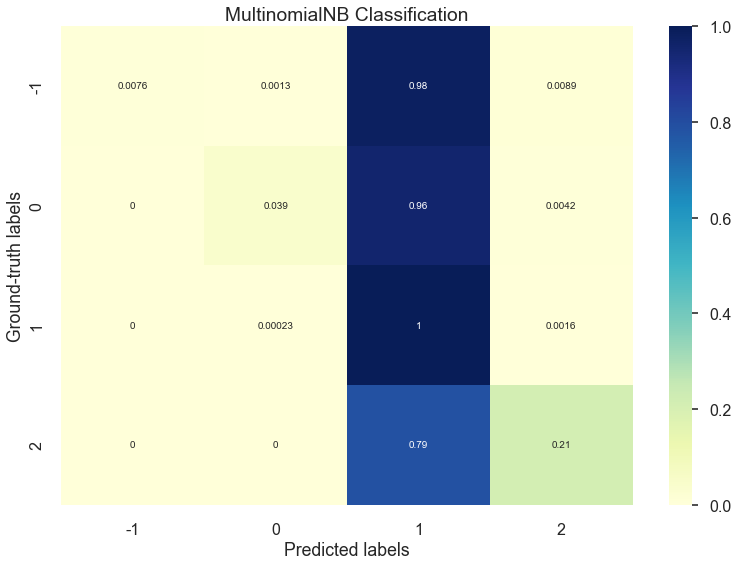

In [21]:
nb = MultinomialNB()
function(tfidf, nb, X_train, y_train, X_valid, y_valid)

## K-Nearest Neighbors


              precision    recall  f1-score   support

          -1       0.53      0.39      0.45       787
           0       0.43      0.41      0.42      1420
           1       0.71      0.78      0.74      4301
           2       0.67      0.61      0.64      1732

    accuracy                           0.64      8240
   macro avg       0.58      0.55      0.56      8240
weighted avg       0.63      0.64      0.64      8240



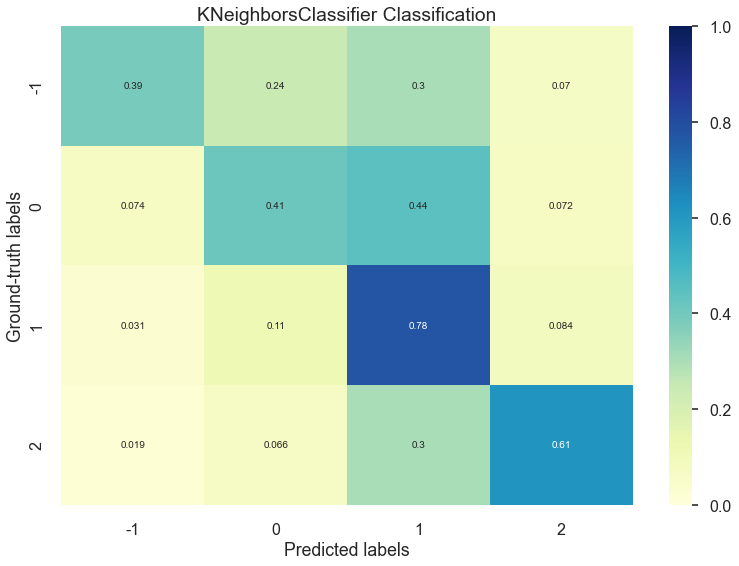

In [22]:
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
function(tfidf, knn, X_train, y_train, X_valid, y_valid)

## [Multinomial] Logistic Regression (Classification)



              precision    recall  f1-score   support

          -1       0.53      0.65      0.58       787
           0       0.54      0.51      0.52      1420
           1       0.84      0.71      0.77      4301
           2       0.65      0.87      0.74      1732

    accuracy                           0.70      8240
   macro avg       0.64      0.68      0.65      8240
weighted avg       0.72      0.70      0.70      8240



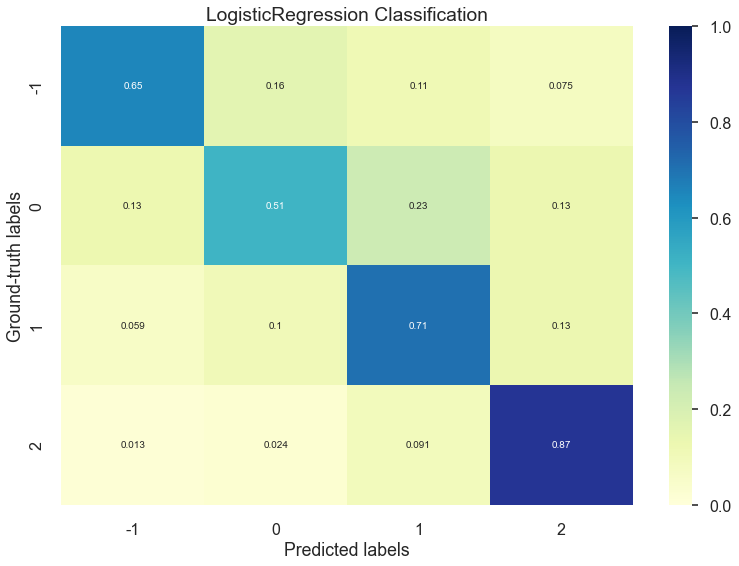

In [23]:
logreg = LogisticRegression(C=1, class_weight="balanced", max_iter=1000)
function(tfidf, logreg, X_train, y_train, X_valid, y_valid)

## Support Vector Machines (Linear SVC)


              precision    recall  f1-score   support

          -1       0.63      0.60      0.61       787
           0       0.59      0.45      0.51      1420
           1       0.80      0.82      0.81      4301
           2       0.72      0.83      0.77      1732

    accuracy                           0.73      8240
   macro avg       0.68      0.67      0.67      8240
weighted avg       0.73      0.73      0.73      8240



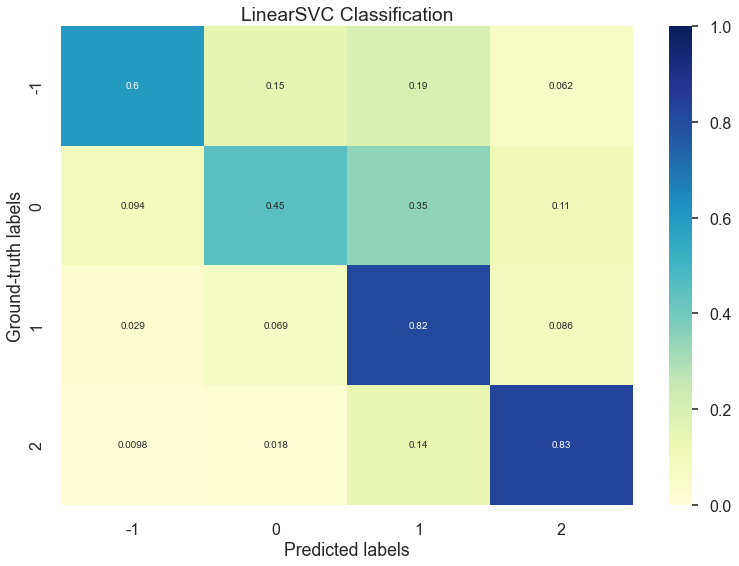

In [24]:
svm_lsvc = LinearSVC(class_weight="balanced")
function(tfidf, svm_lsvc, X_train, y_train, X_valid, y_valid)